In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [35]:
#extracting links dataset
Links_file=pd.read_csv("C:\\Users\\HP Pavilion\\OneDrive\\Desktop\\links.csv")

In [36]:
#extracting tags dataset
Tags_file=pd.read_csv("C:\\Users\\HP Pavilion\\OneDrive\\Desktop\\tags.csv")

In [38]:
#extracting ratings dataset
Ratings_file=pd.read_csv("C:\\Users\\HP Pavilion\\OneDrive\\Desktop\\ratings.csv")

In [37]:
#extracting movies dataset
Movies_file=pd.read_csv("C:\\Users\\HP Pavilion\\OneDrive\\Desktop\\movies.csv")

In [17]:
# shape of "movies.csv"
Movies_file.shape

(9742, 3)

In [18]:
# shape of "ratings.csv"
Ratings_file.shape

(100836, 4)

In [96]:
# unique "userId" available in "ratings.csv"
unique_count = Ratings_file['userId'].nunique()
print(unique_count)

610


In [100]:
# movie that has recieved maximum number of user ratings
ratings_count = Ratings_file['movieId'].value_counts()
max_ratings_movie_id = ratings_count.idxmax()
max_ratings_movie_title = Movies_file.loc[Movies_file['movieId'] == max_ratings_movie_id, 'title'].values[0]
print(f"The movie that received the maximum number of user ratings is: {max_ratings_movie_title}")

The movie that received the maximum number of user ratings is: Forrest Gump (1994)


In [103]:
# tags submitted by users to "Matrix, The (1999)" movie
matrix_movie_id = Movies_file.loc[Movies_file['title'] == 'Matrix, The (1999)', 'movieId'].values[0]
matrix_tags = Tags_file.loc[Tags_file['movieId'] == matrix_movie_id, 'tag']
unique_matrix_tags = matrix_tags.unique()
print(f"Tags for 'Matrix, The (1999)': {unique_matrix_tags}")

Tags for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [120]:
# Average User rating for "Terminator 2: Judgement Day (1991)"
Terminator_2_Judgment_Day_1991_Id = 589
ratings = Ratings_file[Ratings_file['movieId']==Terminator_2_Judgment_Day_1991_Id] 
avg_rating = ratings['rating'].mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991) is {avg_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991) is 3.97


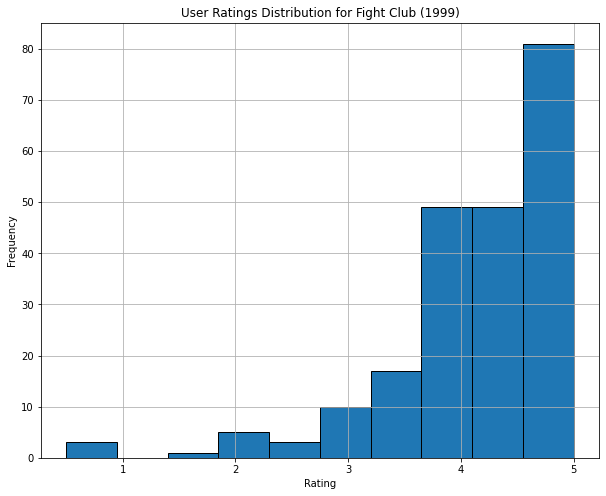

In [121]:
# data distribution of user ratings for "Fight Club (1999)"
import matplotlib.pyplot as plt
fight_club_movie_id = Movies_file.loc[Movies_file['title'] == 'Fight Club (1999)', 'movieId'].values[0]
fight_club_ratings = Ratings_file.loc[Ratings_file['movieId'] == fight_club_movie_id, 'rating']
plt.figure(figsize=(10, 8))
plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
 

In [ ]:
#Which movie is the most popular based on  average user ratings?
#Select all the correct options which comes under top 5 popular movies based on number of user ratings.
#Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [115]:

# Group user ratings by movieId and apply aggregation operations
grouped_df = Ratings_file.groupby("movieId").agg(count=("rating", "count"), mean_rating=("rating", "mean")).reset_index()

# Load the movies data (assuming it's available)


# Join the DataFrames
joined_df = pd.merge(grouped_df, Movies_file, on="movieId")

# Filter movies with more than 50 ratings
filtered_df = joined_df[joined_df["count"] > 50]

# Print the filtered DataFrame
print(filtered_df)

if not filtered_df.empty:
    highest_rated_movie = filtered_df.loc[filtered_df["mean_rating"].idxmax(), "title"]
    print(f"The most popular movie based on average user ratings is: {highest_rated_movie}")
else:
    print("No movies in the dataset have more than 50 user ratings.")


      movieId  count  mean_rating                             title  \
0           1    215     3.920930                  Toy Story (1995)   
1           2    110     3.431818                    Jumanji (1995)   
2           3     52     3.259615           Grumpier Old Men (1995)   
5           6    102     3.946078                       Heat (1995)   
6           7     54     3.185185                    Sabrina (1995)   
...       ...    ...          ...                               ...   
8287   106782     54     3.916667   Wolf of Wall Street, The (2013)   
8354   109374     52     3.778846  Grand Budapest Hotel, The (2014)   
8358   109487     73     3.993151               Interstellar (2014)   
8457   112852     59     4.050847    Guardians of the Galaxy (2014)   
8673   122904     54     3.833333                   Deadpool (2016)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|F

In [116]:
sorted_movies = filtered_df.sort_values(by='count', ascending=False)
top_5_popular_movies = sorted_movies.head(5)
print("The top 5 popular movies based on number of user ratings:")
for movie_title in top_5_popular_movies['title']:
    print(movie_title)

The top 5 popular movies based on number of user ratings:
Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


In [117]:
# Filter for Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by rating count in descending order
sorted_sci_fi = sci_fi_movies.sort_values(by='count', ascending=False)

# Identify the third most popular Sci-Fi movie based on rating count
if len(sorted_sci_fi) >= 3:
    third_most_popular_sci_fi = sorted_sci_fi.iloc[2]  # Third entry in zero-based index
    print(f"The third most popular Sci-Fi movie based on number of user ratings is: {third_most_popular_sci_fi['title']}")
else:
    print("There are not enough Sci-Fi movies with more than 50 ratings to determine the third most popular.")

The third most popular Sci-Fi movie based on number of user ratings is: Jurassic Park (1993)
